# Exploratory analysis for spanish poetry dataset

The main objective is show, see patrons and describe our dataset. Drop NaN and duplicated data

- Load Dataset
- Drop duplicate and NaN
- See patrons

### Load Dataset

In [1]:
## Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# load and first look to dataset
df = pd.read_csv("../../data/ES_corpus/PoemasDelAlmaDataset.csv")

df.head()

NameError: name 'pd' is not defined

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14750 entries, 0 to 14749
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   14694 non-null  object
 1   Poem    14726 non-null  object
 2   Author  14750 non-null  object
dtypes: object(3)
memory usage: 345.8+ KB


In [4]:
df.describe()

,Title,Poem,Author
count,14694,14726,14750
unique,12148,13082,1354
top,Nocturno,Todo el dolor te navegaba por la sangre.\n\r\n...,Luis de Góngora
freq,21,4,436


### First look:

We can see there some null objects in "Title" column and we have many titles duplicate (~2500) and some poem duplicated too(~1700), we're going to see how to clean it

### Dropping:

In [5]:
df=df.drop_duplicates(subset=['Poem']) ## We drop where poems are the same, titles and authors could be repeted
df=df.dropna(subset=['Title'])

In [6]:
df.describe()

,Title,Poem,Author
count,13066,13066,13066
unique,12144,13066,1332
top,Nocturno,\n\n\r\nEntre nosotros crece la ropa en las ma...,Pablo Neruda
freq,17,1,236


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13066 entries, 0 to 14743
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   13066 non-null  object
 1   Poem    13066 non-null  object
 2   Author  13066 non-null  object
dtypes: object(3)
memory usage: 408.3+ KB


In [8]:
df.head()

,Title,Poem,Author
0,Desvaríos,\n\n\r\nEntre nosotros crece la ropa en las ma...,Ángeles Mastretta
1,Caminito del indio,"\n\n\r\nCaminito del indio,\n\r\nsendero coya\...",Atahualpa Yupanqui
2,El poeta,Tú piensas que eres distinto\n\r\nporque te di...,Atahualpa Yupanqui
3,Si una guitarra triste...,Si una guitarra triste me dijera\n\r\nque no q...,Atahualpa Yupanqui
4,¡Adiós!,"\n\nLas cosas que mueren jamás resucitan, \r\n...",Alfonsina Storni


### Dropped: 

We saw there are ~13k poems with its title and author. Now we're going to see some examples of them and we'll clean it up

### See in detail all data:

In [9]:
print(df.isnull().sum()) #There aren't any null data

Title     0
Poem      0
Author    0
dtype: int64


Author
Pablo Neruda              236
Luis de Góngora           218
Mario Benedetti           167
Federico García Lorca     134
Ramón López Velarde       126
Lope de Vega              126
Juan Ramón Jiménez        109
Rubén Darío                96
Gabriela Mistral           87
Delfina Acosta             85
Antonio Machado            83
Gustavo Adolfo Bécquer     82
Marilina Rébora            74
Amado Nervo                71
Alfredo Lavergne           70
Toni García Arias          58
Juana Rosa Pita            55
Claribel Alegría           54
José Asunción Silva        49
Jorge Luis Borges          48
Name: count, dtype: int64


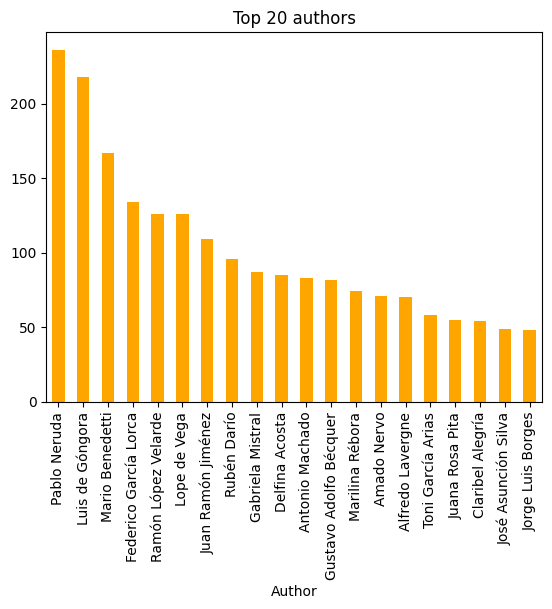

In [10]:
## Most frecuent authors

top_authors = df['Author'].value_counts().head(20)
print(top_authors)
top_authors.plot(kind='bar', title='Top 20 authors', color='orange')
plt.show()

In [11]:
## We see if there are duplicated poems

print(f"Duplicated poems: {df['Poem'].duplicated().sum()}")

Duplicated poems: 0


In [12]:
## We're going to look for too short or too long poems
df['Poem_length_chars']=df["Poem"].apply(len) ## Calculate poem length in chars
df['Poem_length_words']=df["Poem"].apply(lambda x: len(x.split())) ## Calculate poem length in words

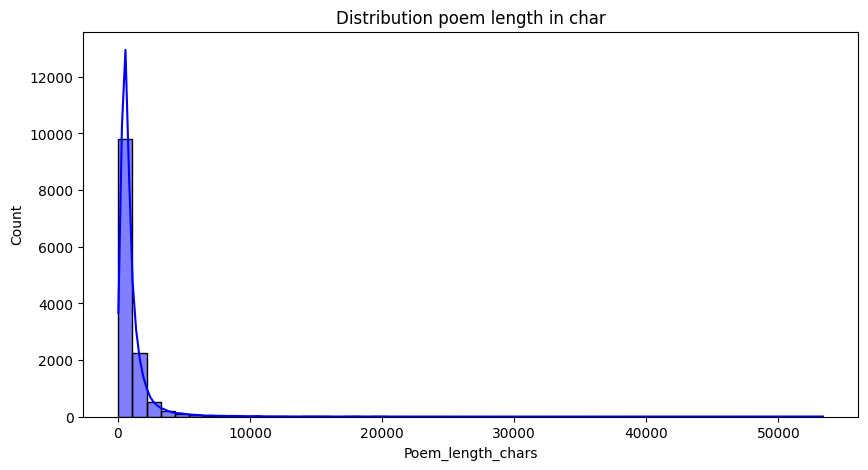

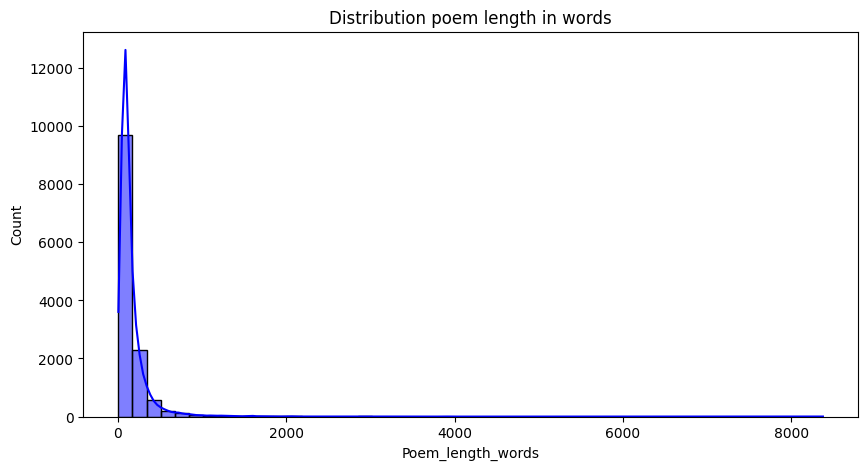

In [13]:
## Graph length of each poem

plt.figure(figsize=(10,5))
sns.histplot(df['Poem_length_chars'],bins=50,kde=True,color='blue')
plt.title('Distribution poem length in char')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["Poem_length_words"], bins=50, kde=True, color='blue')
plt.title('Distribution poem length in words')
plt.show()

In [15]:
short_poems=df[df["Poem_length_words"]<5]
long_poems=df[df["Poem_length_words"]>501]
print(f"There are {len(short_poems)} short poems and {len(long_poems)} long poems")

There are 0 short poems and 516 long poems


In [17]:
long_poems.head(10)

,Title,Poem,Author,Poem_length_chars,Poem_length_words
14,Letanías de la tierra muerta,\n\nLlegará un día en que la raza humana \r\n\...,Alfonsina Storni,3881,642
122,Nubes y vientos,\n\n\r\nDel sol del verano Los rayos de fuego\...,Adela Zamudio,3948,647
134,Carta a la esposa,\n\n\r\nhablame como siempre\n\r\ndecí que me ...,Adriano Corrales Arias,7123,885
240,Variación para un recuerdo,\n\n\r\n I\n\n\n\r\nEl tiem...,Alberto Ángel Montoya,3370,598
283,Padre,\n\n\r\n ...,Alberto Rubio,4962,804
398,La hora es grande,\n\n\r\nEn la vastedad congregada: tu nombre: ...,Alfonso Quijada Urías,2940,516
400,Los estados sobrenaturales,\n\n\r\n1\n\n\n\r\nLas paredes están dentro de...,Alfonso Quijada Urías,5407,884
410,September eleven,\n\n\n\n\r\n Ciu...,Alfonso Quijada Urías,5995,672
557,Sin tregua,\n\n\r\n I\n\n\n\...,Almafuerte,5510,855
865,Este mundo es así...,\n\n\r\nPerseo:\n\r\nEste mundo es así -dice e...,André Cruchaga,3867,623


In [18]:
df['line_breaks']=df['Poem'].apply(lambda x: x.count('\n'))
df['line_breaks'].describe()

count    13066.000000
mean        63.245140
std         91.662554
min          0.000000
25%         28.000000
50%         40.000000
75%         69.000000
max       4405.000000
Name: line_breaks, dtype: float64

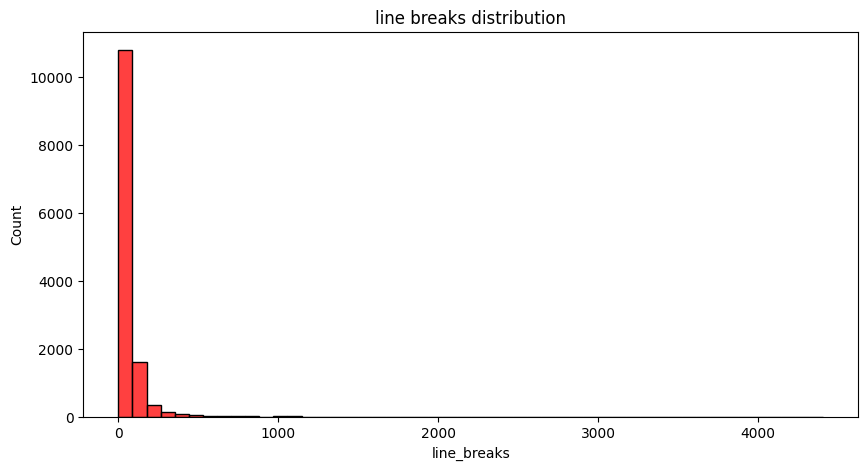

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['line_breaks'], bins=50, color='red')
plt.title("line breaks distribution")
plt.show()

### Details conclusion:

 - We balanced the dataset to see all the uniques poems and items ~13k documents
 - We saw there are some really long poems that could be interpreted as noise, all of this data must be clean
 - There are a lot of line breaks, must be studied if it's necessary stay this breaks of clean it up
 